In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("Set2")
%matplotlib inline

## Разведывательный анализ данных

In [89]:
# загружаем данные
data = pd.read_csv('data/data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [91]:
# переводим названяи столбцов в нижний регистр и меняем пробелы на _
data.columns = data.columns.str.lower().str.replace(' ', '_')

# собираем список строковых столбцов
string_col = list(data.dtypes[data.dtypes == 'object'].index)

# в столбцах понижаем регистр, меняем пробелы на _
for col in string_col:
    data[col] = data[col].str.lower().str.replace(' ', '_')

data.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


### Анализ целевой переменной

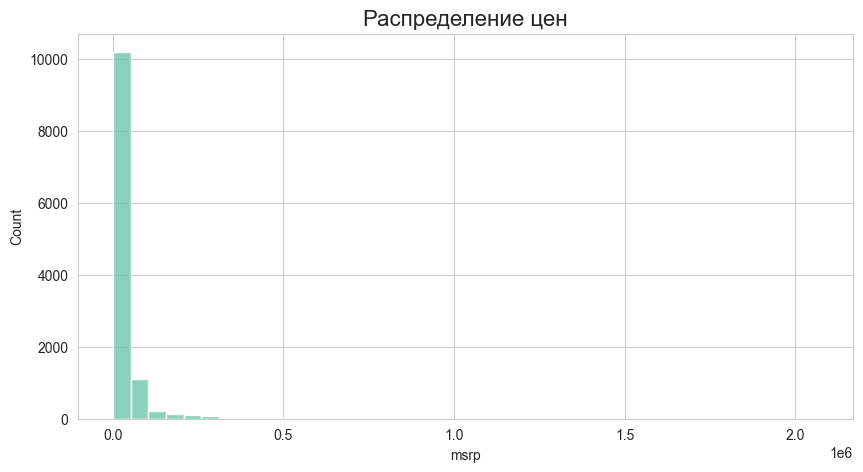

In [92]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data.msrp, bins=40)
ax.set_title('Распределение цен',fontsize=16)
plt.show()

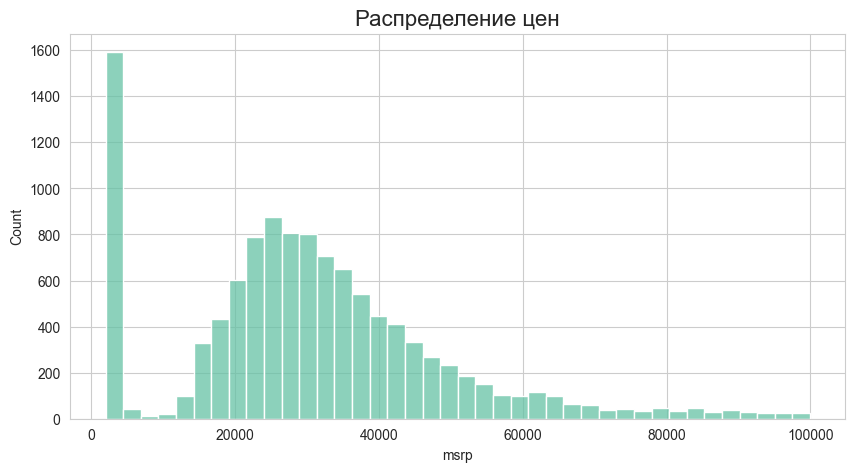

In [93]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data.msrp[data.msrp < 100000], bins=40)
ax.set_title('Распределение цен',fontsize=16)
plt.show()

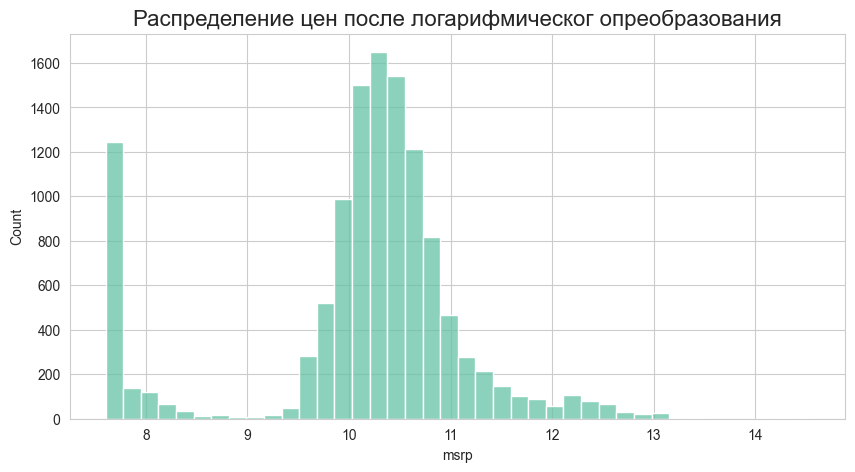

In [94]:
log_prise = np.log1p(data.msrp)
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(log_prise, bins=40)
ax.set_title('Распределение цен после логарифмическог опреобразования',fontsize=16)
plt.show()

### Проверка на пропуски

In [95]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Платформа проверки

In [96]:
n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val+n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = data.iloc[idx]

data_val = data_shuffled.iloc[:n_val].copy()
data_test = data_shuffled.iloc[n_val:n_val+n_test].copy()
data_train = data_shuffled.iloc[n_val+n_test:].copy()

In [97]:
y_val = np.log1p(data_val['msrp'])
y_test = np.log1p(data_test['msrp'])
y_train = np.log1p(data_train['msrp'])

In [98]:
del data_val['msrp']
del data_test['msrp']
del data_train['msrp']

## Линейная регрессия 

In [ ]:
# вручную напишем функцию линеной регрессии (опреедение весовых коэф)

def train_linear_regression(X, y):
    # добавляем фиктивный столбец
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # формула нормлаьного уравнения
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

### Базовое решение 

In [100]:
# выберем признаки на основе которых будем предсказывать цену

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
data_num = data_train[base]

In [101]:
# избавимся от пропусков - заполним пропуски нулями

data_num = data_num.fillna(0)

In [102]:
# преобразовываем датафрейм в NumPy массив

X_train = data_num.values

In [103]:
# обучаем модель

w_0, w = train_linear_regression(X_train, y_train)
print(f'w_0: {w_0}')
print(f'w: {w}')

w_0: 7.963556475096341
w: [ 9.20710435e-03 -1.38559726e-01  1.61265908e-02  1.22881992e-02
 -1.11571602e-05]


In [105]:
# предсказываем цену
y_pred = w_0 + X_train.dot(w)

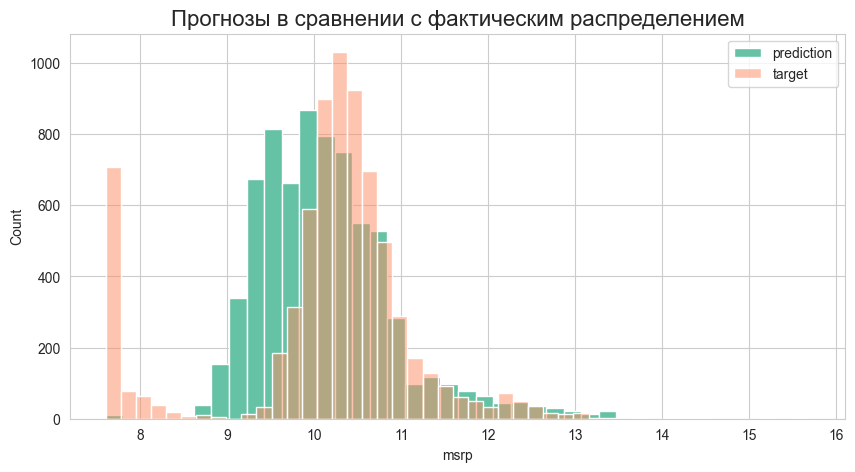

In [114]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(y_pred, bins=40, label='prediction', alpha=1)
sns.histplot(y_train, bins=40, label='target', alpha=0.5)
ax.set_title('Прогнозы в сравнении с фактическим распределением',fontsize=16)
plt.legend()
plt.show()

### Оценка качества модели

In [115]:
# RMSE

def RMSE(y, y_pred):
    error = y_pred-y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [116]:
RMSE(y_train, y_pred)

0.745130516822012